In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD, RMSprop, Adam
from keras import regularizers

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(1)

In [0]:
train=pd.read_csv('trainset.csv')
valid=pd.read_csv('validset.csv')

#train=pd.read_csv('testset.csv')

In [0]:
print(train.shape)
train.head()

(30450, 202)


,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200
0,0,-1.093257e-09,-2.207614e-08,-2.182277e-07,-1.409578e-06,-6.699595e-06,-2.501492e-05,-7.648492e-05,-1.970701e-04,-0.000437,-0.000846,-0.001450,-0.002217,-0.003044,-0.003772,-0.004232,-0.004312,-0.004004,-0.003420,-0.002750,-0.002189,-0.001860,-0.001773,-0.001834,-0.001900,-0.001847,-0.001624,-0.001263,-0.000861,-0.000518,-0.000298,-0.000202,-0.000174,-0.000141,-0.000042,0.000138,0.000372,0.000606,0.000791,0.000904,...,-0.001294,-0.000853,-0.000398,0.000026,0.000387,0.000669,0.000881,0.001042,0.001177,0.001306,0.001442,0.001588,0.001739,0.001887,0.002020,0.002128,0.002206,0.002253,0.002277,0.002292,0.002311,0.002347,0.002401,0.002470,0.002541,0.002601,0.002645,0.002673,0.002693,0.002712,0.002732,0.002748,0.002746,0.002714,0.002644,0.002542,0.002423,0.002305,0.002206,2.0
1,1,-8.943364e-12,-1.559380e-10,-1.274783e-09,-6.386562e-09,-2.108563e-08,-4.258973e-08,-1.535152e-08,2.690837e-07,0.000001,0.000004,0.000010,0.000020,0.000035,0.000056,0.000079,0.000102,0.000119,0.000128,0.000129,0.000124,0.000119,0.000122,0.000135,0.000155,0.000171,0.000171,0.000144,0.000087,0.000010,-0.000073,-0.000141,-0.000182,-0.000193,-0.000182,-0.000164,-0.000154,-0.000159,-0.000175,-0.000193,...,0.000295,0.000276,0.000273,0.000297,0.000343,0.000393,0.000429,0.000434,0.000408,0.000363,0.000319,0.000294,0.000295,0.000312,0.000327,0.000320,0.000284,0.000226,0.000167,0.000132,0.000136,0.000176,0.000232,0.000279,0.000294,0.000274,0.000228,0.000180,0.000152,0.000155,0.000184,0.000221,0.000248,0.000253,0.000235,0.000209,0.000189,0.000185,0.000195,2.0
2,2,-1.520304e-07,-2.234843e-06,-1.541836e-05,-6.619620e-05,-1.975914e-04,-4.336672e-04,-7.218593e-04,-9.291378e-04,-0.000946,-0.000805,-0.000658,-0.000605,-0.000600,-0.000545,-0.000434,-0.000339,-0.000284,-0.000219,-0.000096,0.000073,0.000258,0.000451,0.000661,0.000876,0.001063,0.001204,0.001308,0.001384,0.001391,0.001245,0.000900,0.000421,-0.000046,-0.000380,-0.000562,-0.000653,-0.000714,-0.000755,-0.000760,...,-0.000276,-0.000289,-0.000287,-0.000276,-0.000266,-0.000254,-0.000235,-0.000220,-0.000220,-0.000219,-0.000189,-0.000143,-0.000119,-0.000128,-0.000141,-0.000140,-0.000149,-0.000190,-0.000238,-0.000248,-0.000201,-0.000104,0.000039,0.000198,0.000277,0.000189,-0.000026,-0.000212,-0.000262,-0.000216,-0.000172,-0.000175,-0.000248,-0.000407,-0.000415,0.000482,0.003172,0.007477,0.011275,0.0
3,3,-8.358070e-08,-1.212622e-06,-8.241071e-06,-3.477199e-05,-1.017230e-04,-2.181601e-04,-3.540012e-04,-4.444111e-04,-0.000445,-0.000381,-0.000316,-0.000276,-0.000233,-0.000180,-0.000161,-0.000198,-0.000243,-0.000236,-0.000190,-0.000170,-0.000203,-0.000262,-0.000306,-0.000317,-0.000286,-0.000216,-0.000132,-0.000058,0.000011,0.000095,0.000190,0.000263,0.000284,0.000229,0.000088,-0.000103,-0.000251,-0.000284,-0.000244,...,-0.000095,0.000013,0.000120,0.000108,0.000019,-0.000032,-0.000033,-0.000061,-0.000137,-0.000186,-0.000160,-0.000108,-0.000127,-0.000246,-0.000382,-0.000428,-0.000362,-0.000263,-0.000212,-0.000215,-0.000230,-0.000234,-0.000230,-0.000218,-0.000192,-0.000150,-0.000096,-0.000042,-0.000028,-0.000095,-0.000220,-0.000296,-0.000254,-0.000164,-0.000145,-0.000187,-0.000140,0.000061,0.000293,0.0
4,4,-9.936568e-08,-1.468488e-06,-1.018436e-05,-4.394939e-05,-1.318543e-04,-2.909184e-04,-4.871784e-04,-6.322251e-04,-0.000652,-0.000570,-0.000488,-0.000476,-0.000501,-0.000488,-0.000414,-0.000309,-0.000200,-0.000101,-0.000051,-0.000095,-0.000222,-0.000350,-0.000400,-0.000365,-0.000298,-0.000249,-0.000229,-0.000225,-0.000221,-0.000217,-0.000216,-0.000220,-0.000225,-0.000220,-0.000204,-0.000194,-0.000210,-0.000237,-0.000236,...,0.000374,0.000788,0.001557,0.002724,0.003977,0.004633,0.004098,0.002483,0.000661,-0.000450,-0.000688,-0.000600,-0.000701,-0.000

In [0]:
print(valid.shape)
valid.head()

(6525, 202)


,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200
0,0,-5.058155e-08,-6.888434e-07,-0.000004,-0.000016,-0.000039,-0.000058,-0.000019,0.000169,0.000616,0.001406,0.002505,0.003635,0.004243,0.003801,0.002320,0.000522,-0.000699,-0.001047,-0.000958,-0.000968,-0.001153,-0.001261,-0.001190,-0.001095,-0.001097,-0.001122,-0.001069,-0.000966,-0.000893,-0.000853,-0.000797,-0.000726,-0.000677,-0.000652,-0.000618,-0.000565,-0.000513,-0.000475,-0.000434,...,-0.000951,-0.000872,-0.000763,-0.000731,-0.000746,-0.000717,-0.000642,-0.000582,-0.000548,-0.000497,-0.000420,-0.000356,-0.000323,-0.000290,-0.000229,-0.000153,-0.000094,-0.000070,-0.000084,-0.000124,-0.000167,-0.000183,-0.000167,-0.000149,-0.000155,-0.000169,-0.000151,-0.000079,0.000021,0.000097,0.000111,0.000065,0.000004,-0.000028,-0.000025,-0.000020,-0.000043,-0.000086,-0.000118,1.0
1,1,-1.560623e-07,-2.290205e-06,-0.000016,-0.000068,-0.000201,-0.000441,-0.000731,-0.000936,-0.000947,-0.000808,-0.000680,-0.000662,-0.000691,-0.000660,-0.000574,-0.000515,-0.000499,-0.000441,-0.000263,0.000071,0.000629,0.001520,0.002689,0.003710,0.003922,0.002958,0.001202,-0.000400,-0.001121,-0.001044,-0.000816,-0.000871,-0.001081,-0.001143,-0.001038,-0.000963,-0.000986,-0.000997,-0.000934,...,-0.000004,-0.000096,-0.000200,-0.000310,-0.000396,-0.000426,-0.000406,-0.000362,-0.000305,-0.000233,-0.000155,-0.000097,-0.000074,-0.000075,-0.000075,-0.000060,-0.000026,0.000024,0.000090,0.000159,0.000224,0.000297,0.000425,0.000692,0.001205,0.002017,0.002964,0.003593,0.003384,0.002230,0.000683,-0.000438,-0.000768,-0.000651,-0.000628,-0.000829,-0.000989,-0.000940,-0.000815,1.0
2,2,1.931403e-07,2.486901e-06,0.000014,0.000047,0.000088,0.000053,-0.000210,-0.000763,-0.001399,-0.001725,-0.001550,-0.001129,-0.000888,-0.000934,-0.001012,-0.000921,-0.000754,-0.000670,-0.000643,-0.000572,-0.000481,-0.000457,-0.000466,-0.000398,-0.000259,-0.000173,-0.000185,-0.000190,-0.000083,0.000103,0.000274,0.000400,0.000520,0.000652,0.000766,0.000839,0.000868,0.000830,0.000684,...,0.012108,0.008426,0.001566,-0.004030,-0.005322,-0.003422,-0.001732,-0.001915,-0.002746,-0.002644,-0.001847,-0.001521,-0.001866,-0.002105,-0.001846,-0.001491,-0.001400,-0.001410,-0.001280,-0.001101,-0.001034,-0.001012,-0.000901,-0.000734,-0.000603,-0.000462,-0.000235,-0.000002,0.000082,0.000042,0.000066,0.000239,0.000423,0.000456,0.000342,0.000174,-0.000017,-0.000228,-0.000370,0.0
3,3,4.933117e-08,6.978149e-07,0.000005,0.000019,0.000053,0.000107,0.000158,0.000168,0.000115,0.000027,-0.000045,-0.000081,-0.000105,-0.000149,-0.000210,-0.000255,-0.000264,-0.000252,-0.000243,-0.000247,-0.000252,-0.000238,-0.000192,-0.000107,0.000023,0.000230,0.000599,0.001278,0.002369,0.003689,0.004609,0.004360,0.002754,0.000583,-0.000940,-0.001283,-0.000982,-0.000866,-0.001121,...,0.000181,0.000151,0.000101,0.000057,0.000054,0.000103,0.000176,0.000225,0.000228,0.000204,0.000193,0.000211,0.000239,0.000249,0.000238,0.000231,0.000245,0.000264,0.000263,0.000238,0.000214,0.000206,0.000207,0.000209,0.000230,0.000282,0.000350,0.000395,0.000396,0.000366,0.000330,0.000300,0.000277,0.000262,0.000257,0.000252,0.000239,0.000224,0.000216,1.0
4,4,-1.738062e-07,-2.522923e-06,-0.000017,-0.000073,-0.000214,-0.000460,-0.000744,-0.000917,-0.000860,-0.000625,-0.000391,-0.000281,-0.000243,-0.000162,-0.000005,0.000174,0.000339,0.000498,0.000641,0.000734,0.000773,0.000784,0.000756,0.000636,0.000406,0.000137,-0.000061,-0.000132,-0.000117,-0.000122,-0.000220,-0.000361,-0.000409,-0.000294,-0.000108,0.000002,0.000006,-0.000005,0.000024,...,0.006357,-0.000488,-0.004606,-0.004363,-0.002246,-0.001433,-0.002257,-0.002865,-0.002330,-0.001588,-0.001569,-0.001897,-0.001824,-0.001423,-0.001222,-0.001283,-0.001252,-0.001024,-0.000830,-0.000774,-0.000690,-0.000470,-0.000270,-0.000294,-0.00052

In [0]:
x_train=train.drop('200', axis=1)
y_train=keras.utils.to_categorical(train['200'], num_classes=3)
x_valid=valid.drop('200', axis=1)
y_valid=keras.utils.to_categorical(valid['200'], num_classes=3)

In [0]:
y_train

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [0]:
y_valid

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [0]:
x_train.drop('Unnamed: 0', axis=1, inplace=True)
x_valid.drop('Unnamed: 0', axis=1, inplace=True)

In [0]:
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((30450, 200), (30450, 3), (6525, 200), (6525, 3))

In [0]:
x_train_final=x_train.values
x_valid_final=x_valid.values
y_train_final=y_train
y_valid_final=y_valid

In [0]:
x_train_final.shape, y_train_final.shape

((30450, 200), (30450, 3))

In [0]:
x_valid_final.shape, y_valid_final.shape

((6525, 200), (6525, 3))

In [0]:
np.random.seed(1)

In [0]:
model=Sequential()
model.add(Dense(units=400, activation='relu', input_shape=(200,)))
#model.add(Dropout(0.4))
model.add(Dense(units=700, activation='relu'))

model.add(Dense(units=3, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 400)               80400     
_________________________________________________________________
dense_32 (Dense)             (None, 700)               280700    
_________________________________________________________________
dense_33 (Dense)             (None, 3)                 2103      
Total params: 363,203
Trainable params: 363,203
Non-trainable params: 0
_________________________________________________________________


In [0]:
learning_rate=0.0001
#opt=SGD(lr=learning_rate, momentum=0.9, decay=0.01)    # decay is used to reduce learning rate after each epoch
#opt_rms= RMSprop(lr=0.001, rho=0.9, epsilon=1e-18, decay=0.01)
opt_adam=Adam(lr=learning_rate, beta_1=0.9, beta_2=0.99, epsilon=1e-18)
model.compile(optimizer=opt_adam, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [0]:
history= model.fit(x_train_final, y_train_final, epochs=50)

Epoch 1/50
30450/30450 [==============================] - 6s 181us/step - loss: 0.0011 - acc: 0.9999
Epoch 2/50
30450/30450 [==============================] - 5s 162us/step - loss: 0.0011 - acc: 0.9999
Epoch 3/50
30450/30450 [==============================] - 5s 163us/step - loss: 0.0011 - acc: 0.9999
Epoch 4/50
30450/30450 [==============================] - 5s 163us/step - loss: 0.0011 - acc: 0.9999
Epoch 5/50
30450/30450 [==============================] - 5s 165us/step - loss: 0.0012 - acc: 0.9999
Epoch 6/50
30450/30450 [==============================] - 5s 164us/step - loss: 0.0011 - acc: 0.9999
Epoch 7/50
30450/30450 [==============================] - 5s 163us/step - loss: 0.0011 - acc: 0.9999
Epoch 8/50
30450/30450 [==============================] - 5s 163us/step - loss: 0.0011 - acc: 0.9999
Epoch 9/50
30450/30450 [==============================] - 5s 166us/step - loss: 0.0013 - acc: 0.9999
Epoch 10/50
30450/30450 [==============================] - 5s 165us/step - loss: 0.0011 - a

In [0]:
history.history

{'acc': [0.9999343185550083,
  0.9999343185550083,
  0.9999014778325123,
  0.9999343185550083,
  0.9999014778325123,
  0.9999343185550083,
  0.9999343185550083,
  0.9999343185550083,
  0.9999014778325123,
  0.9999343185550083,
  0.9999014778325123,
  0.9999343185550083,
  0.9998357963875205,
  0.9999343185550083,
  0.9999343185550083,
  0.9999343185550083,
  0.9999343185550083,
  0.9999343185550083,
  0.9999343185550083,
  0.9999343185550083,
  0.9999343185550083,
  0.9999014778325123,
  0.9999014778325123,
  0.9999343185550083,
  0.9999014778325123,
  0.9999343185550083,
  0.9999343185550083,
  0.9998686371100164,
  0.9999343185550083,
  0.9999343185550083,
  0.9998686371100164,
  0.9999343185550083,
  0.9999343185550083,
  0.9999343185550083,
  0.9999014778325123,
  0.9999343185393486,
  0.9999014778325123,
  0.9999343185550083,
  0.9999343185550083,
  0.9999343185550083,
  0.9998357963875205,
  0.9999343185550083,
  0.9999014778325123,
  0.9999343185550083,
  0.9999343185550083,
  0

6525/6525 [==============================] - 1s 81us/step


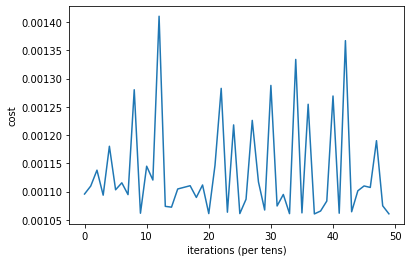



Accuracy on training set is 0.9999343185550083

Accuracy on test set is 0.9975478927203065


In [0]:
results = model.evaluate(x_valid_final, y_valid_final)

plt.plot(np.squeeze(history.history["loss"]))
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.show()

print("\n\nAccuracy on training set is {}".format(history.history["acc"][-1]))
print("\nAccuracy on test set is {}".format(results[1]))

In [0]:
model.save('ECG_disease_detection_3-classes.h5')

NameError: ignored

In [0]:
from keras.models import load_model
new_model=load_model('ECG_disease_detection_3-classes.h5')

In [0]:
new_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 400)               80400     
_________________________________________________________________
dense_32 (Dense)             (None, 700)               280700    
_________________________________________________________________
dense_33 (Dense)             (None, 3)                 2103      
Total params: 363,203
Trainable params: 363,203
Non-trainable params: 0
_________________________________________________________________


In [0]:
new_model.optimizer

In [0]:
new_model.get_weights()

[array([[-1.3148973 ,  0.11733913,  0.03026165, ..., -0.5722325 ,
         -1.0030756 ,  0.15343553],
        [-1.2419558 ,  0.01816591, -0.00170686, ..., -0.42593426,
         -1.0972605 ,  0.10268955],
        [-1.4321119 ,  0.20245437, -0.02276799, ..., -0.4855416 ,
         -1.0658171 ,  0.1010938 ],
        ...,
        [ 0.04654827, -0.06748948,  0.05160508, ..., -0.1583364 ,
         -0.05399799, -0.10931758],
        [ 0.01437884, -0.06470885,  0.07264724, ..., -0.03588863,
         -0.11246745, -0.14007643],
        [-0.10681096, -0.04797844,  0.07145573, ...,  0.00921532,
         -0.07665987, -0.15404254]], dtype=float32),
 array([ 1.83360783e-06, -3.95475538e-04, -4.04085871e-03, -6.08156202e-04,
        -2.95727950e-04,  2.28212029e-03, -7.29299383e-04, -1.41662225e-04,
        -2.25532777e-03, -4.12952970e-04, -4.17736592e-03,  1.27260342e-01,
        -1.93326501e-03, -1.15104602e-03, -4.33029886e-03, -4.25636768e-03,
        -1.34526414e-03,  1.28946573e-01, -5.52607700e

In [0]:
test=pd.read_csv('testset.csv')

In [0]:
print(test.shape)
test

(6525, 202)


,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200
0,0,-1.965237e-07,-2.904522e-06,-2.012138e-05,-8.656956e-05,-2.581107e-04,-5.627718e-04,-0.000921,-0.001138,-0.001036,-0.000596,0.000081,0.000935,0.001900,0.002658,0.002664,0.001675,0.000175,-0.000976,-0.001367,-0.001318,-0.001323,-0.001464,-0.001522,-0.001416,-0.001297,-1.259753e-03,-0.001229,-0.001135,-0.001023,-0.000944,-0.000854,-0.000703,-0.000535,-0.000428,-0.000388,-0.000350,-0.000279,-0.000186,-0.000079,...,-0.000106,-0.000037,0.000091,0.000365,0.000903,0.001733,0.002648,0.003208,0.002995,0.001995,0.000710,-0.000230,-0.000597,-0.000643,-0.000690,-0.000782,-0.000804,-0.000756,-0.000750,-0.000818,-0.000869,-0.000851,-0.000818,-0.000824,-0.000842,-0.000822,-0.000773,-0.000733,-0.000706,-0.000670,-0.000614,-0.000540,-0.000442,-0.000316,-0.000187,-0.000091,-0.000046,-0.000041,-0.000062,1.0
1,1,-8.558216e-08,-1.250049e-06,-8.553730e-06,-3.636160e-05,-1.073493e-04,-2.331537e-04,-0.000385,-0.000497,-0.000509,-0.000421,-0.000279,-0.000128,-0.000024,-0.000036,-0.000183,-0.000375,-0.000472,-0.000441,-0.000368,-0.000328,-0.000338,-0.000432,-0.000583,-0.000382,0.001080,4.496302e-03,0.009088,0.012219,0.011101,0.005594,-0.000944,-0.004420,-0.003844,-0.001834,-0.001213,-0.002034,-0.002528,-0.001975,-0.001348,...,-0.000798,-0.000668,-0.000675,-0.000559,-0.000285,-0.000055,0.000059,0.000197,0.000446,0.000729,0.000961,0.001158,0.001346,0.001484,0.001513,0.001416,0.001174,0.000769,0.000238,-0.000304,-0.000734,-0.001014,-0.001167,-0.001228,-0.001222,-0.001178,-0.001121,-0.001062,-0.000996,-0.000923,-0.000855,-0.000803,-0.000763,-0.000718,-0.000656,-0.000590,-0.000543,-0.000526,-0.000523,0.0
2,2,2.320942e-11,4.813092e-10,4.938072e-09,3.344474e-08,1.682765e-07,6.708955e-07,0.000002,0.000006,0.000015,0.000032,0.000059,0.000100,0.000153,0.000211,0.000265,0.000303,0.000317,0.000302,0.000264,0.000215,0.000167,0.000131,0.000110,0.000100,0.000092,8.022678e-05,0.000063,0.000047,0.000044,0.000063,0.000109,0.000173,0.000244,0.000310,0.000364,0.000411,0.000458,0.000517,0.000586,...,0.000197,0.000216,0.000250,0.000290,0.000322,0.000329,0.000302,0.000248,0.000185,0.000136,0.000118,0.000134,0.000170,0.000200,0.000203,0.000169,0.000109,0.000048,0.000012,0.000020,0.000072,0.000148,0.000223,0.000279,0.000308,0.000324,0.000349,0.000402,0.000489,0.000600,0.000708,0.000786,0.000812,0.000779,0.000698,0.000589,0.000474,0.000369,0.000281,2.0
3,3,-8.954503e-08,-1.308304e-06,-8.971642e-06,-3.830624e-05,-1.138694e-04,-2.496236e-04,-0.000418,-0.000547,-0.000580,-0.000535,-0.000490,-0.000494,-0.000524,-0.000533,-0.000518,-0.000507,-0.000504,-0.000493,-0.000471,-0.000456,-0.000453,-0.000438,-0.000386,-0.000309,-0.000249,-2.345801e-04,-0.000246,-0.000245,-0.000221,-0.000200,-0.000200,-0.000201,-0.000179,-0.000144,-0.000120,-0.000105,-0.000077,-0.000030,0.000021,...,0.000473,0.000512,0.000358,0.000099,-0.000085,-0.000109,-0.000054,-0.000025,-0.000037,-0.000079,-0.000173,-0.000169,0.000563,0.002911,0.006959,0.010947,0.011893,0.008187,0.001758,-0.003163,-0.004034,-0.002276,-0.001063,-0.001553,-0.002322,-0.002069,-0.001329,-0.001174,-0.001511,-0.001536,-0.001131,-0.000872,-0.000975,-0.001054,-0.000871,-0.000667,-0.000654,-0.000670,-0.000513,0.0
4,4,-1.176054e-07,-1.640732e-06,-1.061655e-05,-4.204239e-05,-1.128311e-04,-2.130938e-04,-0.000279,-0.000224,-0.000025,0.000222,0.000364,0.000324,0.000133,-0.000127,-0.000397,-0.000643,-0.000834,-0.000927,-0.000891,-0.000750,-0.000608,-0.000610,-0.000815,-0.001013,-0.000559,1.478317e-03,0.005456,0.010004,0.012125,0.009495,0.003144,-0.002835,-0.005010,-0.003766,-0.002164,-0.002124,-0.002828,-0.002791,-0.002078,...,-0.000416,-0.000453,-0.000462,-0.000439,-0.000379,-0.000301,-0.000236,-0.000197,-0.000172,-0.000145,-0.000117,-0.000097,-0.000096,-0.000111,-0.000

In [0]:
x_test=test.drop('200', axis=1)
#y_test=keras.utils.to_categorical(test['200'], num_classes=3)
y_test=test['200']
x_test.drop('Unnamed: 0', axis=1, inplace=True)

In [0]:
actual_output=y_test.astype('int32')

In [0]:
output=new_model.predict(x_test)

In [0]:
output

array([[1.0544664e-13, 1.0000000e+00, 8.3686565e-21],
       [1.0000000e+00, 2.5848411e-17, 2.7136699e-16],
       [5.0303605e-34, 0.0000000e+00, 1.0000000e+00],
       ...,
       [1.0000000e+00, 1.0116599e-12, 2.5123276e-18],
       [1.0000000e+00, 3.1572941e-15, 7.9223217e-20],
       [4.8705437e-16, 1.0000000e+00, 3.7045977e-10]], dtype=float32)

In [0]:
#Y = tf.one_hot(tf.argmax(output, axis = 1), depth = 3)
output1=np.argmax(output,axis=1)
#pred_output=keras.utils.to_categorical(output1, num_classes=3)
pred_output=output1

In [0]:
pred_output

array([1, 0, 2, ..., 0, 0, 1])

In [0]:
actual_output=np.array(actual_output)

In [0]:
actual_output

array([1, 0, 2, ..., 0, 0, 1], dtype=int32)

In [0]:
accuracy_score(actual_output, pred_output)

0.9969348659003832

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import itertools

In [0]:
results=confusion_matrix(actual_output, pred_output)
print('Confusion Matrix: ')
print(results) 
print('Accuracy Score: ',accuracy_score(actual_output, pred_output)) 
print('Report: ')
print(classification_report(actual_output, pred_output))

Confusion Matrix: 
[[2166    1    0]
 [   0 2132   10]
 [   4    5 2207]]
Accuracy Score:  0.9969348659003832
Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2167
           1       1.00      1.00      1.00      2142
           2       1.00      1.00      1.00      2216

    accuracy                           1.00      6525
   macro avg       1.00      1.00      1.00      6525
weighted avg       1.00      1.00      1.00      6525



In [0]:
cm=results
classes=['Normal', 'Artrial Fibrillation', 'Ventricular Fibrillation']
title='Confusion Matrix ECG disease detection'
cmap=plt.cm.Blues

Accuracy Score:  0.9969348659003832
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2167
           1       1.00      1.00      1.00      2142
           2       1.00      1.00      1.00      2216

    accuracy                           1.00      6525
   macro avg       1.00      1.00      1.00      6525
weighted avg       1.00      1.00      1.00      6525



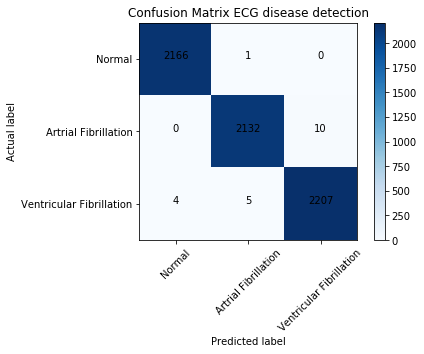

In [0]:
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max()
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j]),
              horizontalalignment="center",
              color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Actual label')
plt.xlabel('Predicted label')


print('Accuracy Score: ',accuracy_score(actual_output, pred_output)) 
print('Classification Report: ')
print(classification_report(actual_output, pred_output))

In [0]:
x_test[1:2]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
1,-8.558216e-08,-0.000001,-0.000009,-0.000036,-0.000107,-0.000233,-0.000385,-0.000497,-0.000509,-0.000421,-0.000279,-0.000128,-0.000024,-0.000036,-0.000183,-0.000375,-0.000472,-0.000441,-0.000368,-0.000328,-0.000338,-0.000432,-0.000583,-0.000382,0.00108,0.004496,0.009088,0.012219,0.011101,0.005594,-0.000944,-0.00442,-0.003844,-0.001834,-0.001213,-0.002034,-0.002528,-0.001975,-0.001348,-0.001439,...,-0.001081,-0.000798,-0.000668,-0.000675,-0.000559,-0.000285,-0.000055,0.000059,0.000197,0.000446,0.000729,0.000961,0.001158,0.001346,0.001484,0.001513,0.001416,0.001174,0.000769,0.000238,-0.000304,-0.000734,-0.001014,-0.001167,-0.001228,-0.001222,-0.001178,-0.001121,-0.001062,-0.000996,-0.000923,-0.000855,-0.000803,-0.000763,-0.000718,-0.000656,-0.00059,-0.000543,-0.000526,-0.000523


In [0]:
actual_output=y_test[1]

In [0]:
actual_output

0.0

In [0]:
pred_output=new_model.predict(x_test[1:2])

In [0]:
pred_output

array([[1.0000000e+00, 2.5848411e-17, 2.7136596e-16]], dtype=float32)

In [0]:
pred_output1=np.argmax(pred_output,axis=1)

In [0]:
pred_output1

array([0])

In [0]:
actual_output

0.0